In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [160]:
NUM_TRIALS = 1500
BANDIT_MEANS = [2, 4, 3, 1]

In [165]:
class Bandit:
  def __init__(self, true_mean):
    self.true_mean = true_mean
    # parameters for mu - prior is N(0,1)
    self.mean_estimate = 0
    self.precision_estimate = 1
    self.precision = 1
    self.number_of_plays = 0

  def pull(self):
    return np.random.normal(self.true_mean, self.precision)

  def sample(self):
    return np.random.normal(self.mean_estimate, self.precision_estimate)

  def update(self, new_sample):
    self.mean_estimate = (self.precision * new_sample + self.precision_estimate * self.mean_estimate) / (self.precision + self.precision_estimate)
    self.precision_estimate += self.precision
    self.number_of_plays += 1

In [168]:
def thompson_sampling_gaussian_experiment():
  bandits = [Bandit(p) for p in BANDIT_MEANS]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
      # use thompson sampling method to select the next bandit
      j = np.argmax([bandit.sample() for bandit in bandits])

      # pull the arm for the bandit with the largest sample
      x = bandits[j].pull()
      # update rewards log
      rewards[i] = x
      # update the distribution for the bandit whose arm we just pulled
      bandits[j].update(x)

  # plot the results
  legend = []
  x = np.linspace(-3, 6, NUM_TRIALS)
  for bandit in bandits:
    plt.plot(x, norm.pdf(x, bandit.mean_estimate, np.sqrt(1. / bandit.precision_estimate)))
    legend.append(f"p: {bandit.true_mean}, np: {(bandit.number_of_plays)}")
  plt.legend(legend)
  plt.title(f"The bandit distributions after {NUM_TRIALS} trials.")


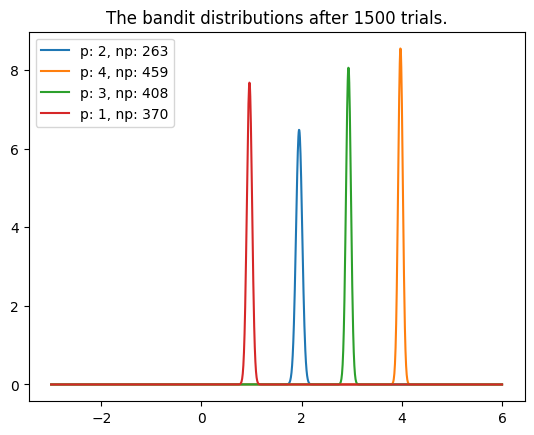

In [169]:
if __name__ == "__main__":
  thompson_sampling_gaussian_experiment()